# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Importing the dataset

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

# EDA

## Taking a look at a sample from our data

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Checking for Null-Values and inappropriate data types

In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We don't have any null values. So, we don't need to think about removing/replacing any values in the rows nor columns we have.

---


The data type matches our values. Therefore, there's no reason to convert any column to another dtype.

## Removing Unnecessary columns

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Renaming the Diagnosis terms

In [9]:
df['diagnosis'].replace({'M': 'malignant', 'B': 'benign'}, inplace=True)

<ipython-input-9-57323b9fe087>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({'M': 'malignant', 'B': 'benign'}, inplace=True)


In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Checking for Potential Outliers using (describe function)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Checking the Frequency for both cases

In [12]:
fig = px.histogram(df, x="diagnosis",color="diagnosis",pattern_shape_sequence="+", color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

## Checking the distribution for the values in the dataset (using Visualization graphs)

This mainly helps us in identifying outliers **graphically**. If any where to be found.

In [13]:
fig = px.histogram(df,
                    x = "radius_mean",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [14]:
fig = px.histogram(df,
                    x = "texture_mean",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [15]:
fig = px.histogram(df,
                    x = "perimeter_mean",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [16]:
fig = px.histogram(df,
                    x = "area_mean",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [17]:
fig = px.histogram(df,
                    x = "smoothness_mean",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [18]:
fig = px.scatter(df,
                    x = "compactness_worst",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [19]:
fig = px.scatter(df,
                    x = "concavity_worst",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

In [20]:
fig = px.scatter(df,
                    x = "fractal_dimension_worst",
                    color="diagnosis",
                    color_discrete_sequence=['#6D213C','#8AAA79'])
fig.show(renderer='iframe')

# Data Preprocessing

## Finding the highly correlated data with our Target

Since we can't find the correlation between the data and our target we would need to **Encode** our diagnosis data to numeric numbers before visualizing the heatmap

Using One-Hot Encoding

One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.


---


Importance of One Hot Encoding

-


We use one hot Encoding because:




1.   Eliminating Ordinality: Many categorical variables have no inherent order (e.g., Benign and Malignant). If we were to assign numerical values (e.g., Bening = 0, Malignant = 1) the model might mistakenly interpret this as a ranking and lead to biased predictions. One Hot Encoding eliminates this risk by treating each category independently.
2.  Improving Model Performance: By providing a more detailed representation of categorical variables. One Hot Encoding can help to improve the performance of machine learning models. It allows models to capture complex relationships within the data that might be missed if categorical variables were treated as single entities.
3.
Compatibility with Algorithms: Many machine learning algorithms particularly based on linear regression and gradient descent which require numerical input. It ensures that categorical variables are converted into a suitable format.

[More about it](http://geeksforgeeks.org/ml-one-hot-encoding/)

In [21]:
df_corr = pd.get_dummies(df, columns=["diagnosis"], dtype=int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
corr = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='rocket',annot=True)
plt.show()

If we took a deeper look into our heatmap. We would find that both malignant and benign correlated values are the same. Which will make us choose the largest noticeable difference between them.

## Obtaining the highest correlated features

In [ ]:
# Get the highest correlation for Benign
corr_benign = corr["diagnosis_benign"].drop(["diagnosis_benign", "diagnosis_malignant"]).abs()
highest_corr_benign = corr_benign.idxmax()
highest_value_benign = corr_benign.max()

# Get the highest correlation for Malignant
corr_malignant = corr["diagnosis_malignant"].drop(["diagnosis_benign", "diagnosis_malignant"]).abs()
highest_corr_malignant = corr_malignant.idxmax()
highest_value_malignant = corr_malignant.max()

print(f"Highest correlated feature for benign: {highest_corr_benign} ({highest_value_benign:.4f})")
print(f"Highest correlated feature for malignant: {highest_corr_malignant} ({highest_value_malignant:.4f})")

Highest correlated feature for benign: concave points_worst (0.7936)
Highest correlated feature for malignant: concave points_worst (0.7936)


This correlated feature is repeated twice, which might appear as a mistake. However, this actually tells us that this is the most important feature to distinguish between benign and malignant is this feature. However, since we are using ".abs", which gives us the absolute to our correlated values, we end up getting the same value.

In [24]:
print(corr[["diagnosis_benign", "diagnosis_malignant"]].loc[highest_corr_benign])


diagnosis_benign      -0.793566
diagnosis_malignant    0.793566
Name: concave points_worst, dtype: float64


## Splitting the data using Train Test Split

The "train_test_split() method" is used to split our data into train and test sets.

---

First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it's predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.


* **Train set:** The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

* **Test set:** The test dataset is a subset of the training dataset that is
utilized to give an accurate evaluation of a final model fit.

* **validation set:**  A validation dataset is a sample of data from your model's training set that is used to estimate model performance while tuning the model's hyperparameters.

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
X = df.drop("diagnosis", axis=1, inplace=False).values
y = df['diagnosis'].values

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarizing our data for more efficient processing

## StandardScaler Vs Normalizer
StandardScaler standardizes features by removing the mean and scaling to unit variance. It transforms the data to have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization.

---

Why Use Standardization in Machine Learning?

- Mean Centering: Standardization centers the data by subtracting the mean from each feature. This ensures that the transformed data has a mean of 0. Mean centering is crucial because it helps in capturing the relative variations in the data.

- Scale Invariance: Standardization scales the data by dividing each feature by its standard deviation. This makes the data scale-invariant, meaning that the scale of the features no longer affects the performance of many machine learning algorithms. Without standardization, features with larger scales may dominate the learning process.

- Improved Convergence: Many machine learning algorithms, such as gradient-based optimization algorithms (e.g., gradient descent), converge faster when the features are standardized. It reduces the potential for numerical instability and overflow/underflow issues during training.

- Comparability: Standardizing the features makes it easier to compare and interpret the importance of each feature. This is especially important in models like linear regression, where the coefficients represent the feature's impact on the target variable.

- Regularization: In regularization techniques like Ridge and Lasso regression, the regularization strength is applied uniformly to all features. Standardization ensures that the regularization term applies fairly to all features.

---


The StandardScaler transformation is given by:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Where:  
- $( X $) is the original feature value.  
- $( \mu $) is the mean of the feature.  
- $( \sigma $) is the standard deviation of the feature.

---

## Normalizer

**Normalizer** scales individual samples to have unit norm. It transforms each sample (row) into a unit vector, preserving the direction of the data while scaling.

For each sample $x$:

$$
x' = \frac{x}{\|x\|}
$$

Where $\|x\|$ is the **norm** of the vector $x$. The default norm used is **L2 norm** (Euclidean distance), but you can specify **L1** or **max norms** as well.

### **When to Use Normalizer?**
- **High-Dimensional Sparse Data**: Useful for text classification, image processing, or any case where the focus is on the **direction** of the data points.
- **Data with Varying Magnitudes**: When the magnitude of the feature vectors matters less than their direction.

[More about it](https://www.geeksforgeeks.org/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing/?ref=ml_lbp)

I will use the **StandardScaler** to scale this dataset, as it achieved a better overall accuracy score compared to the **Normalizer**.

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Implementation

## Logistic Regression

## What is Logistic Regression?

---

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

Key Points:
- Logistic regression predicts the output of a categorical dependent variable. Therefore, the outcome must be a categorical or discrete value.
- It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1).

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Classification Report Metrics

A classification report is needed to evaluate the performance of a classification model. It provides key metrics like precision, recall, F1-score, and support, helping us understand how well the model distinguishes between classes. This is crucial for identifying imbalances, improving predictions, and making informed decisions based on model performance.

---
- **Precision** (also called positive predictive value) is how many of the predicted positive instances are actually correct. It is useful when false positives are costly  
Written as a formula:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

---
- **Recall** (also known as sensitivity) is how many actual positive instances were correctly identified. It is important when false negatives need to be minimized  
Written as a formula:

$$
\text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$


***Both precision and recall are therefore based on relevance.***

---

- **F1 score** can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

$$
F1\text{-}Score = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---
- **Support** is the number of actual occurrences of each class in the dataset. It shows how many true samples belong to each class, helping assess class imbalance and model performance.



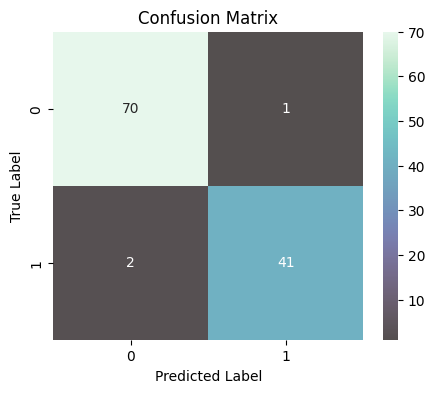

Classification Report:

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98        71
   malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [33]:
y_pred = model.predict(x_test)

cm_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_matrix, cmap="mako", alpha=0.7, annot=True)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


# Saving the model

In [31]:
joblib.dump(model, "logistic_regression.pkl")

['logistic_regression.pkl']